In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#@title
pip install kaggle --upgrade
#@title
import os

os.environ['KAGGLE_USERNAME'] = 'jaehyukc'
os.environ['KAGGLE_KEY'] = '1c3007515607c04e987006dedf15ee98'
#@title
!kaggle datasets download -d uciml/mushroom-classification
#@title
!unzip '*.zip'
#@title
!ls

In [5]:
#@title
import os

os.environ['KAGGLE_USERNAME'] = 'jaehyukc'
os.environ['KAGGLE_KEY'] = '1c3007515607c04e987006dedf15ee98'

In [7]:
#@title
!kaggle datasets download -d uciml/mushroom-classification

  0% 0.00/34.2k [00:00<?, ?B/s]
100% 34.2k/34.2k [00:00<00:00, 12.9MB/s]


In [12]:
# 파일 읽어오기

import pandas as pd
mushrooms = pd.read_csv('mushrooms.csv') 
mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [13]:
# 사이킷런-라벨인코더
# 정수가 아닌 데이터를 정수로 변환

from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for col in mushrooms.columns:
    mushrooms[col] = labelencoder.fit_transform(mushrooms[col]) 
mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1


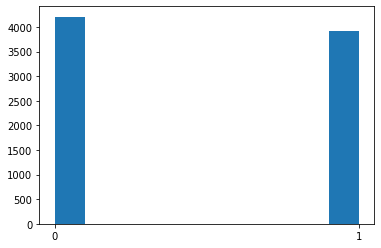

In [15]:
# 데이터 x, y로 분리하는 작업
# 
import matplotlib.pyplot as plt

y = mushrooms['class'].values
x = mushrooms.drop(['class'], axis=1)
x = x.values
x = (x - x.min()) / (x.max() - x.min())

plt.hist(y)
plt.xticks([0, 1])
plt.show()

In [17]:
# 트레인 테스트 데이터 분리

from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf

x_train , x_test , y_train , y_test = train_test_split(x, y,test_size=0.2,random_state=42)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)     # 원핫인코딩으로 0은 [1.0.], 1은 [0.1.] 로 변환
y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)

In [18]:
# 모델
# Dense 레이어 4개, 마지막 레이어 unit=2 선언 ==> 원핫인코딩 출력
# 이항분류 sigmoid

model = tf.keras.Sequential([ 
                             tf.keras.layers.Dense(units=48, activation='relu', input_shape=(22,)), 
                             tf.keras.layers.Dense(units=24, activation='relu'), 
                             tf.keras.layers.Dense(units=12, activation='relu'), 
                             tf.keras.layers.Dense(units=2, activation='sigmoid') 
]) 
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), 
              loss='binary_crossentropy', metrics=['accuracy']) 

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 48)                1104      
                                                                 
 dense_1 (Dense)             (None, 24)                1176      
                                                                 
 dense_2 (Dense)             (None, 12)                300       
                                                                 
 dense_3 (Dense)             (None, 2)                 26        
                                                                 
Total params: 2,606
Trainable params: 2,606
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [19]:
history = model.fit(x_train, y_train, 
                    epochs=25, batch_size=32, validation_split=0.25, 
                    callbacks=[tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss')])

Epoch 1/25
153/153 [==============================] - 1s 4ms/step - loss: 0.3763 - accuracy: 0.8195 - val_loss: 0.1966 - val_accuracy: 0.9182
Epoch 2/25
153/153 [==============================] - 0s 2ms/step - loss: 0.1708 - accuracy: 0.9331 - val_loss: 0.1373 - val_accuracy: 0.9532
Epoch 3/25
153/153 [==============================] - 0s 2ms/step - loss: 0.1221 - accuracy: 0.9592 - val_loss: 0.0705 - val_accuracy: 0.9729
Epoch 4/25
153/153 [==============================] - 0s 2ms/step - loss: 0.0718 - accuracy: 0.9764 - val_loss: 0.0534 - val_accuracy: 0.9871
Epoch 5/25
153/153 [==============================] - 0s 2ms/step - loss: 0.0518 - accuracy: 0.9867 - val_loss: 0.3293 - val_accuracy: 0.9311
Epoch 6/25
153/153 [==============================] - 0s 2ms/step - loss: 0.0580 - accuracy: 0.9830 - val_loss: 0.0218 - val_accuracy: 0.9938
Epoch 7/25
153/153 [==============================] - 0s 2ms/step - loss: 0.0198 - accuracy: 0.9941 - val_loss: 0.0188 - val_accuracy: 0.9938
Epoch 

In [21]:
# 테스트를 사용한 모델 성능 평가 결과

model.evaluate(x_test, y_test)

51/51 [==============================] - 0s 1ms/step - loss: 0.0371 - accuracy: 0.9920


[0.03705935925245285, 0.9919999837875366]

In [22]:
# 데이터확인을 통해 예측하기
# [1.0.] 이면 0 이므로 독이 없는 버섯

print(x_test[0])
print(y_test[0])
print(x_test[0].shape)

[0.18181818 0.         0.36363636 0.         0.45454545 0.09090909
 0.09090909 0.         0.27272727 0.09090909 0.27272727 0.18181818
 0.         0.63636364 0.63636364 0.         0.18181818 0.09090909
 0.         0.27272727 0.27272727 0.09090909]
[1. 0.]
(22,)


In [23]:
# 예측값 또한 [1.0.]에 가까운 결과가 도출

print(model.predict(x_test[0:1]))

[[9.9997461e-01 2.4846498e-05]]
